# Advanced Data Visualisation

- Waffle Chart
- Word Cloud
- Maps with Marker, Choropleth


In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 435.7 kB/s eta 0:00:01
   ------------ --------------------------- 92.2/299.9 kB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from wordcloud import WordCloud

## Word Cloud

Biasa digunakan untuk membuat visual summary dari dokumen text


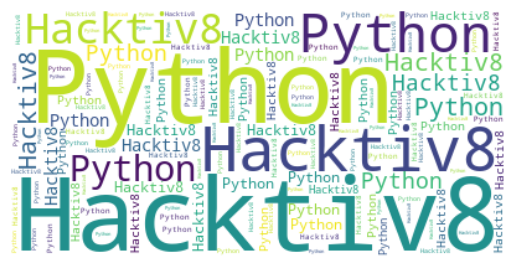

In [13]:
# contoh data
text = "Hacktiv8 " * 100 + "Python " * 20

# kita isi opsi2 Word Cloud nya dulu, baru minta generate
wc = WordCloud(background_color="white", collocations=False, repeat=True)
wc.generate(text)

# minta pyplot untuk image show
plt.axis("off")  # hapus axis
plt.imshow(wc, interpolation='bilinear')
plt.show()

Kita coba gunakan data imigrasi Canada, ubah jadi text, lalu jadi Word Cloud


In [15]:
df_can = pd.read_excel("dataset/Canada.xlsx",
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [16]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [26]:
# kita totalkan jumlah imigran per negara
df_can['total'] = df_can[[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
                          1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                          2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                          2010, 2011, 2012, 2013]].sum(axis=1)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,6
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,15


In [34]:
# bikin jadi text, sesuai masing2 negara punya berapa banyak imigran
# total imigrasi
total_sum = df_can['total'].sum()
total_sum

6409153

In [47]:
# bagi per negara sesuai proporsi nya, nama negara nya muncul berapa kali di text kita

can_text = ""
len_of_text = 50000

for country in df_can['OdName']:
    text_country = country
    text_country = text_country.replace(" ", "")
    text_country = text_country.replace("(", "")
    text_country = text_country.replace(")", "")
    text_country = text_country.replace(".", "")
    text_country = text_country.replace("-", "")
    text_country = text_country.replace(",", "")
    text_country = text_country.replace("'", "")

    proporsi_country = df_can.loc[df_can['OdName']
                                  == country, 'total'].values[0] / total_sum
    freq_country = int(proporsi_country * len_of_text)

    can_text += f" {text_country}" * freq_country

can_text

' Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Af

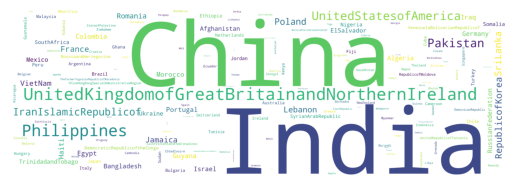

In [52]:
# membuat wordcloud
wc_can = WordCloud(background_color='white',
                   collocations=False,
                   width=3000,
                   height=1000)
wc_can.generate(can_text)

# show dengan pyplot
plt.axis("off")
plt.imshow(wc_can)
plt.show()

In [ ]:
# cek bentuk mask (file gambar) sebagai numpy array di Python
img_alice = Image.open("dataset/alice_mask.png")

# convert to numpy array
arr_alice = np.array(img_alice)

print(type(arr_alice), arr_alice.shape)

<class 'numpy.ndarray'> (400, 461)


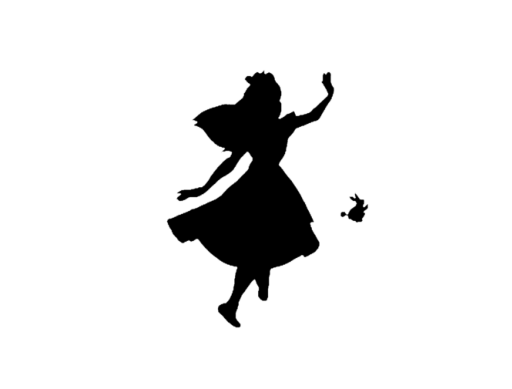

In [55]:
arr_alice

# dari array jadi gambar
plt.axis('off')
plt.imshow(arr_alice)
plt.show()

In [66]:
# cek bentuk mask (file gambar) sebagai numpy array di Python
img_canada = Image.open("dataset/canada-map-illustration.png")

# convert to numpy array
arr_canada = np.array(img_canada)

print(type(arr_canada), arr_canada.shape)

<class 'numpy.ndarray'> (2000, 2000, 4)


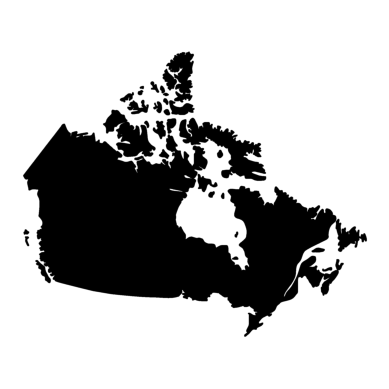

In [67]:
arr_canada

# dari array jadi gambar
plt.axis('off')
plt.imshow(arr_canada)
plt.show()

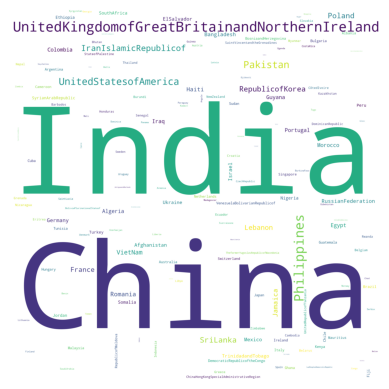

In [68]:
# membuat wordcloud
wc_can = WordCloud(background_color='white',
                   collocations=False,
                   mask=arr_canada)
wc_can.generate(can_text)

# show dengan pyplot
plt.axis("off")
plt.imshow(wc_can)
plt.show()

gambar yang kita gunakan sebagai "mask" perlu memiliki 2 warna saja, hitam dan putih, yg hitam akan digunakan sebagai bentuk word cloud nya, yg putih tetap kosong. gambar mask kita di atas masih kurang bersih jadi bentuknya tidak terlihat. tapi gambar alice bisa digunakan sebagai mask.
